# Plot Incumbent Training Process against baseline

In [1]:
from plotting.plot_utils import get_logtable, set_rc_params
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
set_rc_params()

In [2]:
database_name = "fehring_growing_nn_new"

In [3]:
baseline_smac_callback_data = get_logtable(database_name=database_name, table_name="bb_net2deeper_baseline", logtable_name="smac_callbacks")
baseline_training_process_data = get_logtable(database_name=database_name, table_name="bb_net2deeper_baseline", logtable_name="training_process")

net2deeper_smac_callback_data = get_logtable(database_name=database_name, table_name="net2deeper", logtable_name="smac_callbacks")
net2deeper_training_process_data = get_logtable(database_name=database_name, table_name="net2deeper", logtable_name="training_process")

2024-07-31 09:14:52,829  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-07-31 09:14:52,829  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-07-31 09:14:52,830  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-31 09:14:52,830  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-31 09:14:52,830  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-31 09:14:52,830  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-31 09:14:52,830  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-31 09:14:52,831  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-31 09:14:52,831  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-31 09:14:52,831  | py-experimenter - WARNING  | No values given for keyfield n_ev

2024-07-31 09:14:52,904  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-31 09:14:53,057  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-31 09:14:53,136  | py-experimenter - INFO     | Opening tunnel: 127.0.0.1:3306 <> 127.0.0.1:3306
2024-07-31 09:14:53,231  | py-experimenter - INFO     | Initialized and connected to database
2024-07-31 09:14:53,392  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-07-31 09:14:53,393  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-07-31 09:14:53,393  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-31 09:14:53,394  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-31 09:14:53,394  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-31 09:14:53,395  | py-experimenter - WARNING  | No values given for keyfield max_episod

In [4]:
baseline_smac_callback_data.head()

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,cost
0,1,1,2024-07-29 10:43:44,1,None,"{'batch_size': 64, 'ent_coef': 0.1861694086343...",1.0630
1,2,1,2024-07-29 11:05:32,2,None,"{'batch_size': 256, 'ent_coef': 0.074653743579...",1.1784
2,3,1,2024-07-29 11:44:43,3,None,"{'batch_size': 128, 'ent_coef': 0.244189932290...",1.3386
3,4,1,2024-07-29 13:35:42,4,None,"{'batch_size': 32, 'ent_coef': 0.1324634098447...",1.9600
4,5,1,2024-07-29 15:34:43,5,None,"{'batch_size': 32, 'ent_coef': 0.2976173403672...",1.4728


In [5]:
baseline_training_process_data.head()

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,mean_cost,mean_cost_stdev,all_costs,actions_per_episode,rewards_per_episode
0,1,1,2024-07-29 10:42:34,2,0,None,100000,-1.551,0.776871,[ 0. -1.97999996 -1.93999996 -1.929999...,"{0: [[2, 4, 3, 2, 4, 3, 2, 4, 3, 2, 4, 3, 2, 4...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2,1,2024-07-29 10:42:34,2,0,None,200000,-0.299,0.898114,[ 0. 0. 0. 0. ...,"{0: [[0, 5, 4, 0, 3, 0, 6, 4, 6, 4, 6, 4, 6, 4...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,3,1,2024-07-29 10:42:34,2,0,None,300000,-1.384,0.906402,[-1.93999996 -1.98999996 0. -1.999999...,"{0: [[4, 4, 4, 5, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.01, -0...."
3,4,1,2024-07-29 10:42:34,2,0,None,400000,-1.373,0.899167,[-1.99999996 -1.91999996 -1.97999996 -1.929999...,"{0: [[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7...","{0: [[-0.01, -0.01, -0.01, -0.01, -0.01, -0.01..."
4,5,1,2024-07-29 10:42:34,2,0,None,500000,-1.283,1.089710,[ 1. -1.87999996 -1.99999996 -1.999999...,"{0: [[6, 6, 2], [4, 0, 4, 0, 7, 2, 0, 2, 0, 2,...","{0: [[0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0..."


In [6]:
net2deeper_smac_callback_data.head()

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,cost
0,1,1,2024-07-26 15:48:31,1,1,"{'batch_size': 64, 'ent_coef': 0.1861694086343...",0.9948
1,2,1,2024-07-26 15:54:17,2,1,"{'batch_size': 256, 'ent_coef': 0.074653743579...",0.9456
2,3,1,2024-07-26 16:00:57,3,1,"{'batch_size': 128, 'ent_coef': 0.244189932290...",0.9262
3,4,1,2024-07-26 16:18:33,4,1,"{'batch_size': 32, 'ent_coef': 0.1324634098447...",1.8412
4,5,1,2024-07-26 16:37:45,5,1,"{'batch_size': 32, 'ent_coef': 0.2976173403672...",1.3516


In [7]:
net2deeper_training_process_data.head()

,ID,experiment_id,timestamp,worker_id,trial_number,budget,hyperparameter_str_identifier,timestep,mean_cost,mean_cost_stdev,all_costs,actions_per_episode,rewards_per_episode
0,1,1,2024-07-26 15:48:11,1,0,None,None,25000,-1.680,0.893633,[ 1. -1.97999996 -1.97999996 -1.979999...,"{0: [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6...","{0: [[0.0, 0.0, -0.01, -0.01, -0.01, -0.01, -0..."
1,2,1,2024-07-26 15:48:11,1,0,None,None,50000,-1.958,0.030266,[-1.97999996 -1.98999996 -1.98999996 -1.939999...,"{0: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{0: [[0.0, 0.0, -0.01, -0.01, -0.01, -0.01, -0..."
2,3,1,2024-07-26 15:48:11,1,0,None,None,75000,-1.376,1.188190,[ 1. -1.93999996 -1.95999996 -1.929999...,"{0: [[5, 5, 5, 4, 5], [6, 6, 6, 6, 6, 6, 6, 6,...","{0: [[0.0, 0.0, 0.0, 0.0, 1.0], [-0.01, -0.01,..."
3,4,1,2024-07-26 15:48:12,1,0,None,None,100000,-1.979,0.026627,[-1.99999996 -1.97999996 -1.99999996 -1.939999...,"{0: [[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5...","{0: [[-0.01, -0.01, -0.01, -0.01, -0.01, -0.01..."
4,5,1,2024-07-26 15:48:12,1,0,None,None,125000,-1.966,0.024980,[-1.91999996 -1.97999996 -1.93999996 -1.959999...,"{0: [[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [8]:
baseline_smac_incumbent = baseline_smac_callback_data.iloc[baseline_smac_callback_data["cost"].idxmin()]
baseline_incumbent_trial_number = baseline_smac_incumbent["trial_number"] -1
baseline_hyperparameter_str_identifier = baseline_smac_incumbent["hyperparameter_str_identifier"]

In [9]:
# Select all net2deeper trialnumbers with the same hyperparameter string identifier as the incumbent
net2deeper_final_incumbent = net2deeper_smac_callback_data.iloc[net2deeper_smac_callback_data["cost"].idxmin()]
net2deeper_hyperparameter_str_identifier = net2deeper_final_incumbent["hyperparameter_str_identifier"]
net2deeper_incumbents = net2deeper_smac_callback_data[net2deeper_smac_callback_data["hyperparameter_str_identifier"] == net2deeper_hyperparameter_str_identifier]
net2deeper_incumbents_trial_numbers = net2deeper_incumbents["trial_number"] - 1
net2deeper_incumbents_trial_numbers

60    60
65    65
71    71
76    76
Name: trial_number, dtype: int64

In [10]:
baseline_training_process_data = baseline_training_process_data[baseline_training_process_data["trial_number"] == baseline_incumbent_trial_number]
net2deeper_training_process_data = net2deeper_training_process_data[net2deeper_training_process_data["trial_number"].isin(net2deeper_incumbents_trial_numbers)]

In [11]:
baseline_training_process_data.head()

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,mean_cost,mean_cost_stdev,all_costs,actions_per_episode,rewards_per_episode
1000,1001,1,2024-07-29 19:46:29,1,10,None,100000,-1.978,0.018868,[-1.97999996 -1.99999996 -1.94999996 -1.979999...,"{0: [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6...","{0: [[0.0, 0.0, -0.01, -0.01, -0.01, -0.01, -0..."
1001,1002,1,2024-07-29 19:46:29,1,10,None,200000,-1.963,0.017916,[-1.95999996 -1.97999996 -1.96999996 -1.939999...,"{0: [[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3...","{0: [[0.0, 0.0, 0.0, 0.0, -0.01, -0.01, -0.01,..."
1002,1003,1,2024-07-29 19:46:29,1,10,None,300000,-1.649,0.883226,[ 1. -1.92999996 -1.90999996 -1.909999...,"{0: [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1,...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0..."
1003,1004,1,2024-07-29 19:46:29,1,10,None,400000,-1.680,0.893454,[ 1. -1.98999996 -1.99999996 -1.959999...,"{0: [[7, 7], [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,...","{0: [[0.0, 1.0], [0.0, 0.0, 0.0, -0.01, -0.01,..."
1004,1005,1,2024-07-29 19:46:29,1,10,None,500000,-1.948,0.024413,[-1.92999996 -1.94999996 -1.90999996 -1.969999...,"{0: [[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.01..."


In [12]:
net2deeper_training_process_data.head()

,ID,experiment_id,timestamp,worker_id,trial_number,budget,hyperparameter_str_identifier,timestep,mean_cost,mean_cost_stdev,all_costs,actions_per_episode,rewards_per_episode
6000,6001,1,2024-07-26 23:31:54,2,60,None,None,25000,-1.980,0.012649,[-1.97999996 -1.99999996 -1.94999996 -1.979999...,"{0: [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6...","{0: [[0.0, 0.0, -0.01, -0.01, -0.01, -0.01, -0..."
6001,6002,1,2024-07-26 23:31:54,2,60,None,None,50000,-1.970,0.028284,[-1.94999996 -1.91999996 -1.92999996 -1.989999...,"{0: [[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, -0.01, -0.01, -..."
6002,6003,1,2024-07-26 23:31:55,2,60,None,None,75000,-1.663,0.887987,[-1.91999996 -1.97999996 -1.93999996 -1.979999...,"{0: [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6003,6004,1,2024-07-26 23:31:55,2,60,None,None,100000,-1.672,0.890806,[-1.98999996 -1.96999996 -1.97999996 -1.959999...,"{0: [[3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6...","{0: [[0.0, -0.01, -0.01, -0.01, -0.01, -0.01, ..."
6004,6005,1,2024-07-26 23:31:55,2,60,None,None,125000,-1.968,0.029597,[-1.95999996 -1.99999996 -1.95999996 -1.999999...,"{0: [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6...","{0: [[0.0, 0.0, 0.0, 0.0, -0.01, -0.01, -0.01,..."


In [13]:
max_timesteps = net2deeper_training_process_data["timestep"].max()

In [14]:
net2deeper_training_process_dataframes = []
for i,trial_number in enumerate(net2deeper_incumbents_trial_numbers):
    current = net2deeper_training_process_data[net2deeper_training_process_data["trial_number"] == trial_number]
    current["timestep"] += i * max_timesteps
    net2deeper_training_process_dataframes.append(current)
net2deeper_training_process_concat_dataframe = pd.concat(net2deeper_training_process_dataframes)

2024-07-31 09:15:08,540  | py.warnings - WARNING  | /tmp/ipykernel_619286/1805000408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current["timestep"] += i * max_timesteps

2024-07-31 09:15:08,540  | py.warnings - WARNING  | /tmp/ipykernel_619286/1805000408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current["timestep"] += i * max_timesteps

2024-07-31 09:15:08,540  | py.warnings - WARNING  | /tmp/ipykernel_619286/1805000408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy 

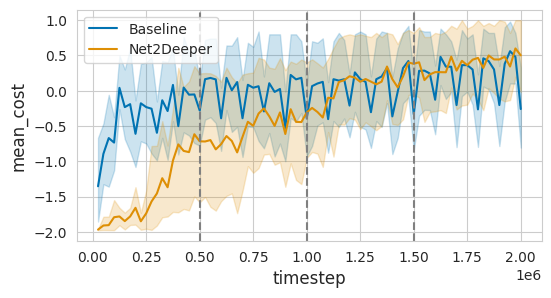

In [15]:
sns.lineplot(data=baseline_training_process_data, x="timestep", y="mean_cost", label="Baseline")
sns.lineplot(data=net2deeper_training_process_concat_dataframe, x="timestep", y="mean_cost", label="Net2Deeper")
# Add vline every 500000 timesteps
for i in range(1, int(net2deeper_training_process_concat_dataframe["timestep"].max()/500000)):
    plt.axvline(x=i*500000, color="gray", linestyle="--")